**Valencia Melita - 0706022210007**

# **Week 7**


---


## Random Forest and Gradient Boosting Classifier
Today lab exercise will be using Bank Marketing Dataset
- Download the **Bank Marketing Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
Age <br>
Job : type of job <br>
Marital : marital status <br>
Education <br>
Default: has credit in default? <br>
Housing: has housing loan? <br>
Loan: has personal loan? <br>
Contact: contact communication type <br>
Month: last contact month of year <br>
Day: last contact day of the week <br>
Duration: last contact duration, in seconds. Important
note: this attribute highly affects the output target (e.g., if
duration=0 then y='no'). <br>
Campaign: number of contacts performed during this campaign and for
this client (includes last contact) <br>
Pdays: number of days that passed by after the client was last
contacted from a previous campaign (999 means client was not
previously contacted) <br>
Previous: number of contacts performed before this campaign and for
this client <br>
Poutcome: outcome of the previous marketing campaign <br>
y: has the client subscribed a term deposit?

## Import Libraries

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

## Load Dataset

In [192]:
df = pd.read_csv('https://raw.githubusercontent.com/valenciamelita/Dataset-DM/main/Bank.csv', delimiter=';')
df.head() # Mencetak baris 5 teratas

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no

## Exploratory Data Analysis
Explore the data to identify patterns within the dataset. <br>
Hint: <br>
* There are no missing values, but some columns contain 'unknown' values. Decide whether it is best to drop it or not.
* The 'admin' and 'management' unique value in the job column represent similar roles, so you can combine them under a single categorical value.




In [193]:
df.info()
# Menampilkan informasi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [194]:
df.describe()

age       balance          day     duration     campaign  \
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
std      10.576211   3009.638142     8.247667   259.856633     3.109807   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

             pdays     previous  
count  4521.000000  4521.000000  
mean     39.766645     0.542579  
std     100.121124     1.693562  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     871.000000    25.000000

In [195]:
df.shape
# Ada 4521 baris dan 17 kolom

(4521, 17)

In [196]:
df.isna().sum()
# Menampilkan apakah ada null di dalam kolom

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [197]:
obj_column = [ 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

for col in obj_column:
  print(f'{col}: {df[col].unique().tolist()}')

# Mengetahui setiap unique value dalam kolom kategorikal

job: ['unemployed', 'services', 'management', 'blue-collar', 'self-employed', 'technician', 'entrepreneur', 'admin.', 'student', 'housemaid', 'retired', 'unknown']
marital: ['married', 'single', 'divorced']
education: ['primary', 'secondary', 'tertiary', 'unknown']
default: ['no', 'yes']
housing: ['no', 'yes']
loan: ['no', 'yes']
contact: ['cellular', 'unknown', 'telephone']
month: ['oct', 'may', 'apr', 'jun', 'feb', 'aug', 'jan', 'jul', 'nov', 'sep', 'mar', 'dec']
poutcome: ['unknown', 'failure', 'other', 'success']
y: ['no', 'yes']


In [198]:
(df == 'unknown').sum()
# Menampilkan jumlah unknown di dalam kolom

age             0
job            38
marital         0
education     187
default         0
balance         0
housing         0
loan            0
contact      1324
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     3705
y               0
dtype: int64

In [199]:
for column in df.columns:
    if df[column].dtype == object:
        mode_value = df[column].mode()[0]
        df[column] = df[column].replace('unknown', mode_value)

df.head()
# Mengganti kolom unknown dengan modus setiap kolom

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3  cellular    3   jun       199         4     -1         0  unknown  no  
4  cellular    5   may       226         1     -1         0  unknown  no

In [200]:
# Menggabungkan admin dan management di kolom job
df['job'] = df['job'].replace(['admin.', 'management'], 'admin_management')

In [201]:
(df == 'unknown').sum()
# Menampilkan jumlah unknown di dalam kolom

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     3705
y               0
dtype: int64

In [202]:
# Melakukan encoding
le = LabelEncoder()
df['job'] = le.fit_transform(df['job'])
df['marital'] = le.fit_transform(df['marital'])
df['default'] = le.fit_transform(df['default'])
df['housing'] = le.fit_transform(df['housing'])
df['loan'] = le.fit_transform(df['loan'])
df['contact'] = le.fit_transform(df['contact'])
df['month'] = le.fit_transform(df['month'])
df['poutcome'] = le.fit_transform(df['poutcome'])
df['y'] = le.fit_transform(df['y'])
df.head()

age  job  marital  education  default  balance  housing  loan  contact  \
0   30    9        1    primary        0     1787        0     0        0   
1   33    6        1  secondary        0     4789        1     1        0   
2   35    0        2   tertiary        0     1350        1     0        0   
3   30    0        1   tertiary        0     1476        1     1        0   
4   59    1        1  secondary        0        0        1     0        0   

   day  month  duration  campaign  pdays  previous  poutcome  y  
0   19     10        79         1     -1         0         3  0  
1   11      8       220         1    339         4         0  0  
2   16      0       185         1    330         1         0  0  
3    3      6       199         4     -1         0         3  0  
4    5      8       226         1     -1         0         3  0

In [203]:
# Melakukan mapping untuk education
df['education'] = df['education'].map({'primary': 0, 'secondary': 1, 'tertiary': 2})
df.head()

age  job  marital  education  default  balance  housing  loan  contact  \
0   30    9        1          0        0     1787        0     0        0   
1   33    6        1          1        0     4789        1     1        0   
2   35    0        2          2        0     1350        1     0        0   
3   30    0        1          2        0     1476        1     1        0   
4   59    1        1          1        0        0        1     0        0   

   day  month  duration  campaign  pdays  previous  poutcome  y  
0   19     10        79         1     -1         0         3  0  
1   11      8       220         1    339         4         0  0  
2   16      0       185         1    330         1         0  0  
3    3      6       199         4     -1         0         3  0  
4    5      8       226         1     -1         0         3  0

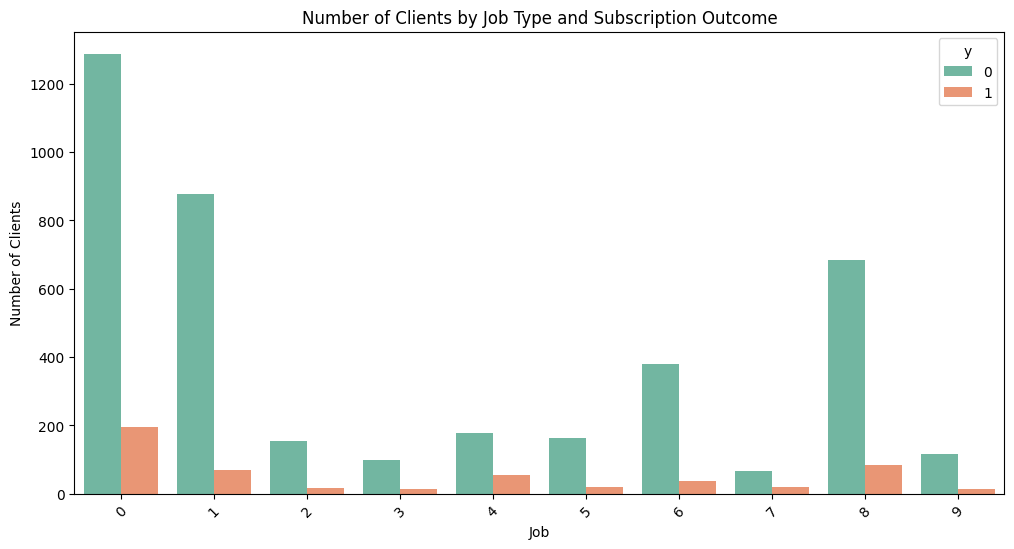

In [252]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='job', hue='y', palette='Set2')
plt.title('Number of Clients by Job Type and Subscription Outcome')
plt.xlabel('Job')
plt.ylabel('Number of Clients')
plt.xticks(rotation=45)
plt.show()

# # Most clients in certain job categories (codes 0 and 1) do not subscribe, as indicated by the high number of "No" responses compared to "Yes" in these categories.
# This suggests that certain job types tend to be less interested in or eligible for subscription. The small number of "Yes" responses indicates that clients from most job types are less likely to subscribe.

([0, 1, 2], [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2')])

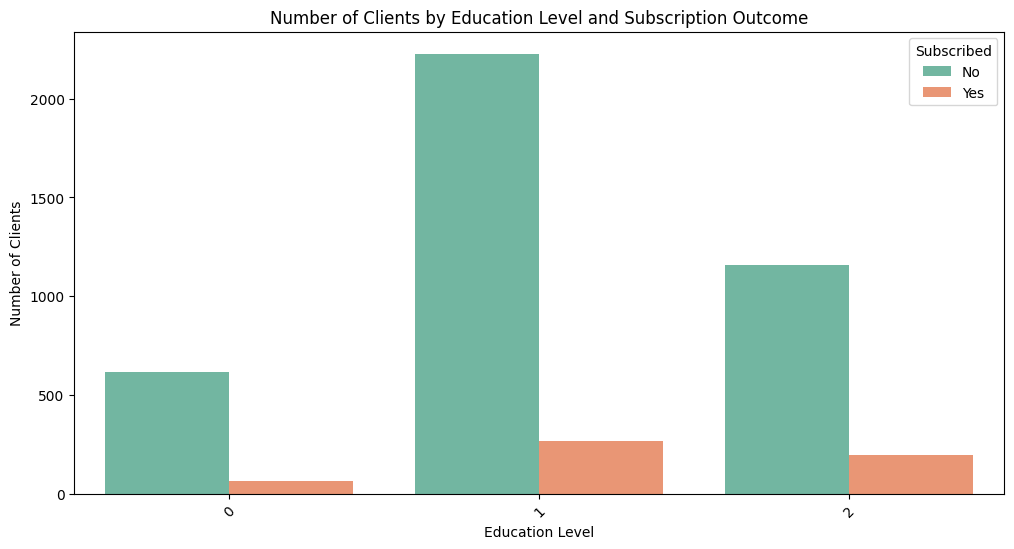

In [254]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='education', hue='y', palette='Set2')
plt.title('Number of Clients by Education Level and Subscription Outcome')
plt.xlabel('Education Level')
plt.ylabel('Number of Clients')
plt.legend(title='Subscribed', loc='upper right', labels=['No', 'Yes'])
plt.xticks(rotation=45)

# This suggests that clients across all education levels are generally less likely to subscribe.
# However, clients with education level 1 form the largest group of non-subscribers, possibly indicating that this group may have lower interest or eligibility for the subscription product being offered.


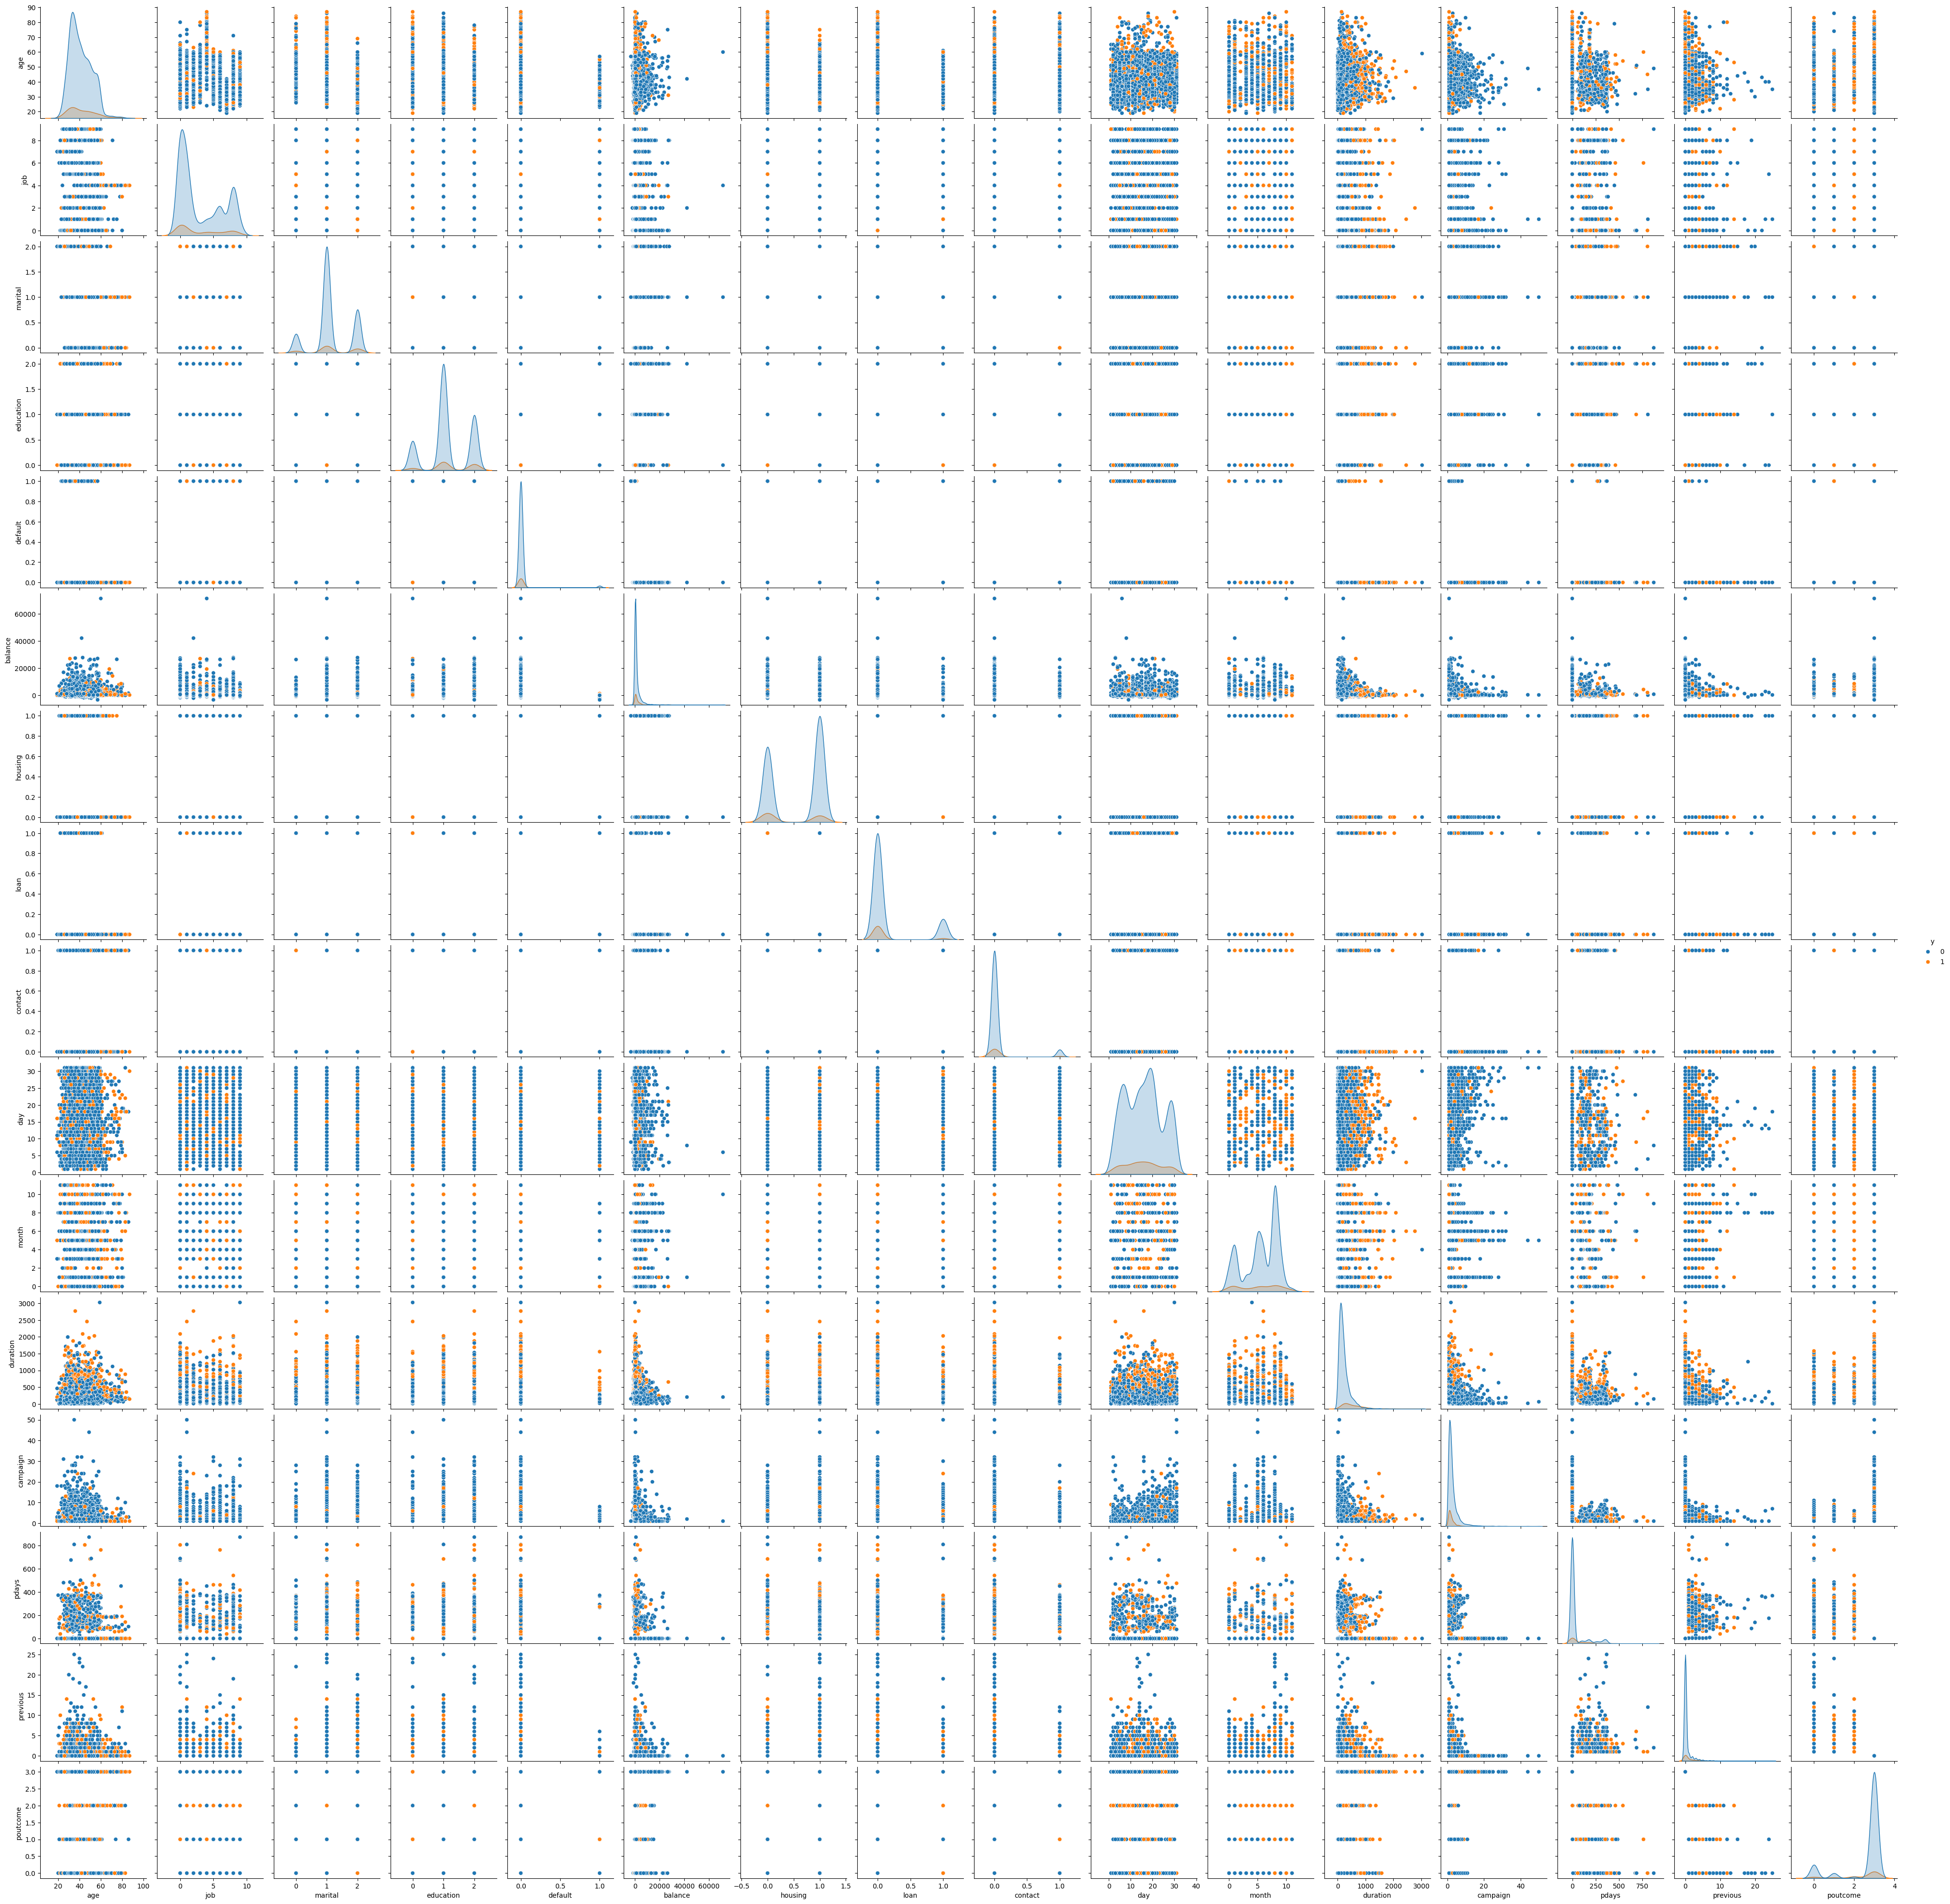

In [248]:
sns.pairplot(df, hue='y', diag_kind='kde')
plt.show()
# Menampilkan pairplot

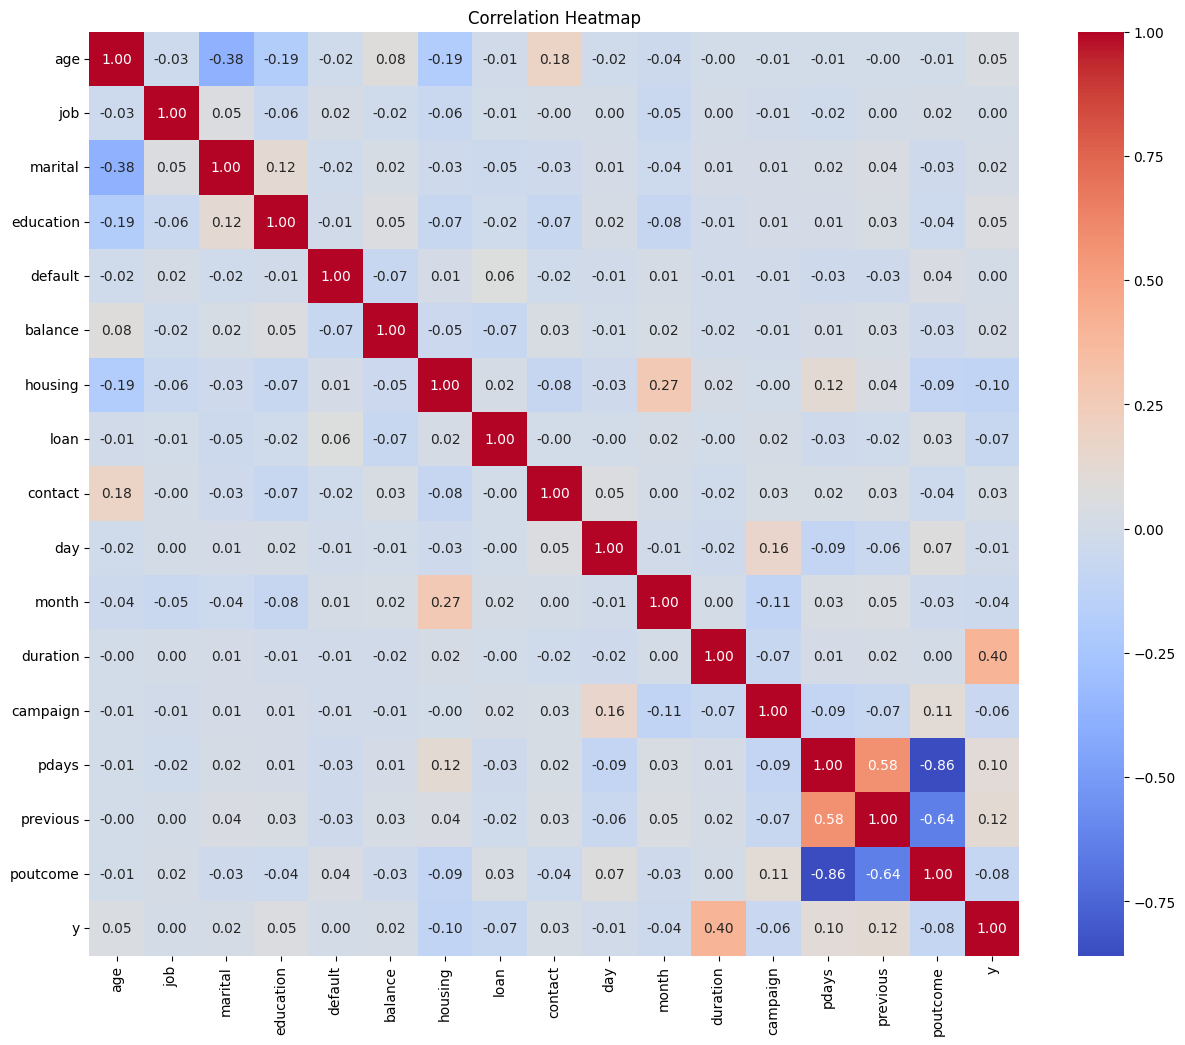

In [246]:
plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Correlation Map menunjukkan korelasi yang baik dengan duration, pdays, housing dan previous


Dari matriks korelasi ini, terlihat bahwa variabel-variabel dalam data memiliki korelasi yang lemah satu sama lain, dengan sebagian besar nilai berada di sekitar nol. Korelasi yang sedikit lebih tinggi terlihat antara variabel pdays dan previous (0.58), serta antara pdays dan poutcome (-0.86), yang menunjukkan bahwa jumlah hari sejak kontak sebelumnya dan hasil kampanye sebelumnya mungkin memiliki hubungan tertentu. Korelasi tertinggi dengan variabel target y adalah duration (0.40), yang menunjukkan bahwa durasi kontak mungkin memiliki pengaruh terhadap hasil kampanye. Secara keseluruhan, korelasi antar-variabel ini rendah, yang mengindikasikan bahwa sebagian besar variabel tidak berkaitan langsung satu sama lain, sehingga model prediktif mungkin memerlukan teknik tambahan atau fitur lain untuk meningkatkan akurasinya.

## Machine Learning (Split Data) 4 Variables

In [205]:
# X = df.drop('y', axis=1)
# X = df.drop(['duration', 'pdays', 'previous'], axis=1)
X = df[['duration', 'pdays', 'previous','housing']]
y = df['y'] # Target variable

In [206]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)


In [207]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

In [208]:
X_train.shape, X_test.shape

((6400, 4), (1600, 4))

## Random Forest


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [209]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [210]:
y_pred = rf_classifier.predict(X_test)

In [211]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.838125


In [212]:
train_accuracy = rf_classifier.score(X_train, y_train)
test_accuracy = rf_classifier.score(X_test, y_test)
print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Train Accuracy: 0.82328125
Test Accuracy: 0.838125


In [213]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[645 156]
 [103 696]]


In [214]:
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.81      0.83       801
           1       0.82      0.87      0.84       799

    accuracy                           0.84      1600
   macro avg       0.84      0.84      0.84      1600
weighted avg       0.84      0.84      0.84      1600



## Machine Learning (Split Data) All Independent Variables

In [215]:
X = df.drop('y', axis=1)
y = df['y'] # Target variable

In [216]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)


In [217]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

In [218]:
X_train.shape, X_test.shape

((6400, 16), (1600, 16))

## Random Forest


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [219]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5, min_samples_split=5, min_samples_leaf=4)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=5,
                       random_state=42)

In [220]:
y_pred = rf_classifier.predict(X_test)

In [221]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8625


In [222]:
train_accuracy = rf_classifier.score(X_train, y_train)
test_accuracy = rf_classifier.score(X_test, y_test)
print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Train Accuracy: 0.8553125
Test Accuracy: 0.8625


In [223]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[665 136]
 [ 84 715]]


In [224]:
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       801
           1       0.84      0.89      0.87       799

    accuracy                           0.86      1600
   macro avg       0.86      0.86      0.86      1600
weighted avg       0.86      0.86      0.86      1600



## Conclusion
---
### Perbandingan Berdasarkan Kriteria:

Akurasi: Menggunakan semua variabel menghasilkan akurasi yang lebih tinggi (0.8625) dibandingkan dengan menggunakan 4 variabel (0.8381).

Training Set Score: Dengan semua variabel, akurasi pada set pelatihan adalah 0.8553, lebih tinggi daripada akurasi dengan 4 variabel (0.8233). Ini menunjukkan bahwa model yang menggunakan semua variabel dapat belajar lebih baik pada data pelatihan.

Classification Report:

Model dengan semua variabel menunjukkan nilai precision, recall, dan f1-score yang lebih tinggi di kedua kelas (0 dan 1), dengan nilai rata-rata sekitar 0.86, dibandingkan dengan 4 variabel yang rata-rata sekitar 0.84.
Selain itu, keseimbangan antara precision dan recall pada kedua kelas juga sedikit lebih baik dengan semua variabel, sehingga memberikan model yang lebih seimbang.


Berdasarkan akurasi, training set score, dan classification report, pendekatan menggunakan semua variabel independen dengan SMOTE adalah yang terbaik. Model ini menunjukkan kinerja yang lebih konsisten dan akurat, serta dapat menggeneralisasi dengan baik pada data pengujian.

## Gradient Boosting Classifier


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

## GB Classifier (Split Data) 4 Variables

---

In [225]:
# X = df.drop('y', axis=1)
# X = df.drop(['duration', 'pdays', 'previous'], axis=1)
X = df[['duration', 'pdays', 'previous','housing']]
y = df['y'] # Target variable

In [226]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)


In [227]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

In [228]:
X_train.shape, X_test.shape

((6400, 4), (1600, 4))

In [229]:
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier(n_estimators=100, max_depth=5, random_state=42)
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=5, random_state=42)

In [230]:
y_pred = gb_classifier.predict(X_test)

In [231]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.864375


In [232]:
train_accuracy = gb_classifier.score(X_train, y_train)
test_accuracy = gb_classifier.score(X_test, y_test)
print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Train Accuracy: 0.8734375
Test Accuracy: 0.864375


In [233]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[660 141]
 [ 76 723]]


In [234]:
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       801
           1       0.84      0.90      0.87       799

    accuracy                           0.86      1600
   macro avg       0.87      0.86      0.86      1600
weighted avg       0.87      0.86      0.86      1600



## GB Classifier (Split Data) All Variables

---

In [235]:
X = df.drop('y', axis=1)
y = df['y'] # Target variable

In [236]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)


In [237]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

In [238]:
X_train.shape, X_test.shape

((6400, 16), (1600, 16))

In [239]:
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier(n_estimators=100, max_depth=5, random_state=42)
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=5, random_state=42)

In [240]:
y_pred = gb_classifier.predict(X_test)

In [241]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.915


In [242]:
train_accuracy = gb_classifier.score(X_train, y_train)
test_accuracy = gb_classifier.score(X_test, y_test)
print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Train Accuracy: 0.95734375
Test Accuracy: 0.915


In [243]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[716  85]
 [ 51 748]]


In [244]:
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       801
           1       0.90      0.94      0.92       799

    accuracy                           0.92      1600
   macro avg       0.92      0.92      0.91      1600
weighted avg       0.92      0.92      0.91      1600



## Conclusion
---

Perbandingan Berdasarkan Kriteria:

Akurasi: Model yang menggunakan semua variabel mencapai akurasi lebih tinggi (0.915) dibandingkan model yang menggunakan 4 variabel saja (0.8644). Ini menunjukkan bahwa model dengan semua variabel lebih baik dalam memprediksi data pengujian.

Training Set Score: Dengan semua variabel, akurasi pada set pelatihan mencapai 0.9573, lebih tinggi dibandingkan dengan model yang menggunakan 4 variabel (0.8734). Hal ini menunjukkan bahwa model dengan semua variabel dapat mempelajari pola pada data dengan lebih baik.


Classification Report:

Dengan semua variabel, nilai precision, recall, dan f1-score lebih tinggi untuk kedua kelas (0 dan 1), dengan nilai rata-rata sekitar 0.91, dibandingkan 4 variabel yang rata-rata sekitar 0.86.
Model dengan semua variabel juga menunjukkan keseimbangan yang baik antara precision dan recall di kedua kelas, memberikan kinerja yang lebih optimal.

Kesimpulan Akhir

Berdasarkan akurasi, training set score, dan classification report, model dengan semua variabel independen setelah dilakukan SMOTE adalah yang terbaik. Model ini memberikan kinerja yang lebih tinggi dan lebih konsisten pada data pengujian, menjadikannya pilihan terbaik untuk memprediksi data baru dengan lebih akurat.






